# CSCE 556 - Data Analysis in Python: Application to Neuroscience

## Laboratory 8 - EEG analysis

### Part 1 - Scalp EEG analyses

#### Installing packages and importing functions

In [ ]:
# Install some required package, if they are not already installed
!pip install mne

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 14.0 MB/s eta 0:00:00


In [ ]:
#https://mne.tools/dev/auto_examples/datasets/limo_data.html#ex-limo-data
import numpy as np
import matplotlib.pyplot as plt

import mne
from mne.datasets.limo import load_data
from mne.stats import linear_regression
from mne.viz import plot_events, plot_compare_evokeds
from mne import combine_evoked

import seaborn as sns

#### Importing the data for one specific subject

In [ ]:
# This step can take a little while if you're loading the data for the
# first time.

# subject to use
subj = 1
limo_epochs = load_data(subject=subj, update_path=True)

Using default location ~/mne_data for LIMO...
Creating ~/mne_data


100%|████████████████████████████████████████| 710k/710k [00:00<00:00, 312MB/s]
100%|███████████████████████████████████████| 115M/115M [00:00<00:00, 15.3GB/s]


Attempting to create new mne-python configuration file:
/root/.mne/mne-python.json
Download complete in 14s (110.2 MB)


# Create a figure that looks like this one:

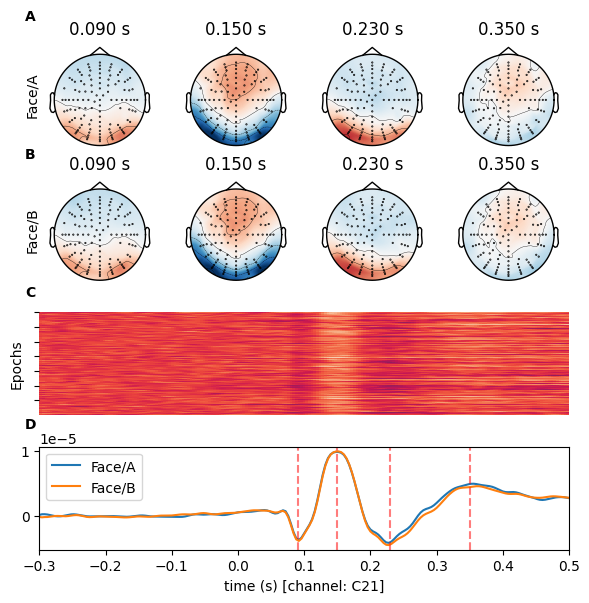

Note the following aspect of this figure:
- Panels are labeled A through D in a boldface font (look at `matplotlib.figure.Figure.text(...)`)
- The two first panels are rows of topomaps. The timing of these topomaps is displayed on top and the type of events is written on the left side of the row. See the `mne.Evoked.plot_topomap(...)` function to plot such topomaps. Note that `MNE-python` has three main types of EEG data structure: `Raw`, `Epochs`, and `Evoked`. The first one represents a continuous EEG recording, the second one represents an EEG recording that has been epoched (e.g., in an event-related paradigm), and the third one represents the evoked potentials obtained from averaging across epochs.
- The third panel is a heatmap where the epochs have been stacked along the y-axis, **for the channel C21**.
- The fourth panel shows the event-related potentials for both types of stimuli, **for the channel C21**. On that panel, red dashed lines with 30% opacity correspond to the times used for displaying the topomaps, see `matplotlib.axes.Axes.axvline()`
- Note that the grid plot is irregular (not all axes have the same size). You will not be able to obtain such behavior with `plt.subplots`. That can be achieved with `plt.subplot` (no "s" here) and you can see an example here: https://stackoverflow.com/a/67031012. Alternatively, it can also be made using `matplotlib.gridspec.GridSpec` (I have shown an example of the use of `GridSpec` in the slides).

In [360]:
df = limo_epochs.to_data_frame()
df

,time,condition,epoch,A1,A2,A3,A4,A5,A6,A7,...,D27,D28,D29,D30,D31,D32,EXG1,EXG2,EXG3,EXG4
0,-0.299944,Face/A,0,0.027916,-0.293442,-3.528548,-1.831236,0.687517,0.636676,-6.678770,...,0.264045,-1.283308,-2.115078,-1.618534,-2.124744,0.0,2.916298,3.211704,-1.562307,5.039104
1,-0.295945,Face/A,0,0.635375,0.246511,-3.958570,-2.024388,1.881159,1.294752,-8.276156,...,1.241387,-0.590377,-2.033228,-1.153411,-1.899001,0.0,4.082402,4.718326,-1.256758,5.590618
2,-0.291946,Face/A,0,0.583440,0.228884,-3.384974,-1.822090,1.587026,0.571232,-6.651098,...,1.410654,-0.040177,-1.167992,-0.261346,-0.677918,0.0,3.072411,2.998852,0.947815,4.860678
3,-0.287946,Face/A,0,-0.271939,-0.699614,-4.918588,-2.474570,0.522583,-0.592875,-7.405902,...,0.888391,-0.713005,-1.324611,-0.610178,-0.602149,0.0,2.278139,0.882533,2.542504,6.866239
4,-0.283947,Face/A,0,-1.509058,-2.003382,-6.596169,-2.815811,-0.655516,-1.755088,-7.820307,...,-0.027815,-1.487251,-1.426850,-1.274338,-0.780294,0.0,0.975283,-1.234293,2.846755,8.441280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212050,0.483910,Face/B,1054,8.324191,7.225405,10.273245,1.488351,-3.682532,1.321745,-0.931549,...,-0.877543,3.230950,0.982502,-0.069437,-0.751595,0.0,-5.383134,-7.704541,-7.682693,-8.904872
212051,0.487909,Face/B,1054,9.450967,7.223378,10.028537,1.364277,-3.480741,1.060896,-1.511271,...,-1.641042,2.707052,0.200722,-1.192575,-1.980864,0.0,-6.394845,-8.347926,-8.857436,-9.884304
212052,0.491908,Face/B,1054,10.463145,7.291555,9.880336,1.118896,-2.897693,0.458544,-2.519621,...,-2.308051,2.311064,-0.796029,-2.511075,-3.514141,0.0,-7.958112,-11.781577,-10.449087,-11.233150
212053,0.495908,Face/B,1054,10.922755,7.330324,9.667111,0.687887,-2.236573,-0.211315,-3.617050,...,-2.775517,2.198236,-1.897280,-3.695292,-5.193367,0.0,-9.573632,-16.331339,-12.207070,-12.596368


<ipython-input-361-203aa147da85>:68: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
<ipython-input-361-203aa147da85>:68: UserWarning: tight_layout not applied: number of rows in subplot specifications must be multiples of one another.
  fig.tight_layout()


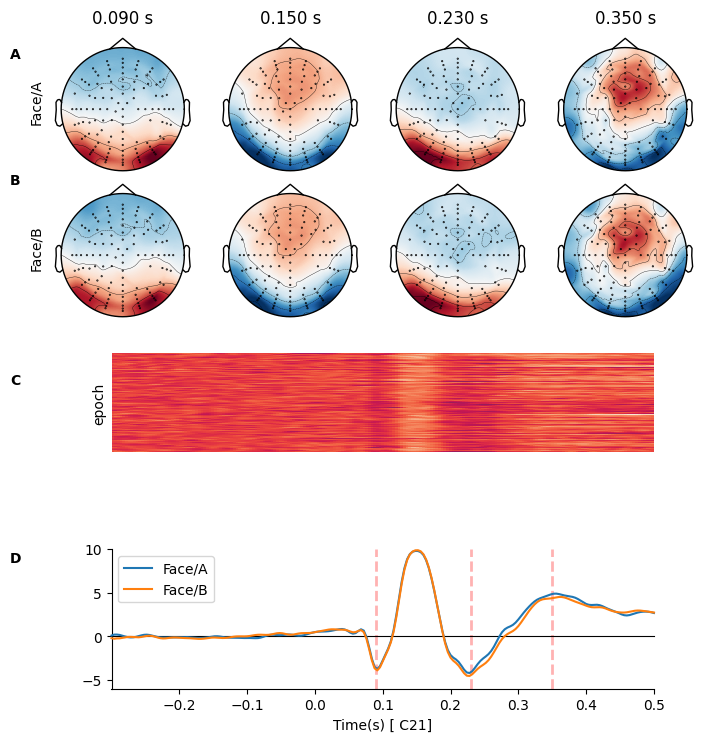

In [361]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig = plt.figure(figsize=(7, 10.5), facecolor='white')

gs2 = gridspec.GridSpec(2,4)
axes2 = np.array([[fig.add_subplot(gs2[row,col]) for col in range(4) for row in range(2)]])


for ax in axes2.ravel():
  ax.axes.xaxis.set_visible(False)
  ax.axes.yaxis.set_visible(False)


for ax in axes2.ravel():
    # Hide spines
    for spine in ax.spines.values():
        spine.set_visible(False)
    # Hide x and y axis
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
gs2.tight_layout(fig, rect=[0.0, 0.45, 1.0, 0.75], w_pad=0.0, h_pad=0.5)

fig.text(-.02, .71, 'A', fontweight='bold')
fig.text(-.02, .59, 'B', fontweight='bold')
fig.text(-.02, .40, 'C', fontweight='bold')
fig.text(-.02, .23, 'D', fontweight='bold')

for idx, time in enumerate(topomap_times):
  ax_face_a = fig.add_subplot(gs2[0, idx])
  mne.Evoked.plot_topomap(limo_epochs['Face/A'].average(), axes=ax_face_a, times=time, colorbar=False, show=False)
  # ax_face_a.axis('off')

  ax_face_b = fig.add_subplot(gs2[1, idx])
  mne.Evoked.plot_topomap(limo_epochs['Face/B'].average(), axes=ax_face_b, times=time, colorbar=False, show=False)
  #ax_face_b.axis('off')
  ax_face_b.set_title('')

  if idx == 0:
    ax_face_a.set_ylabel('Face/A')
    ax_face_b.set_ylabel('Face/B')

gs3 = gridspec.GridSpec(7,1)
ax1 = fig.add_subplot(gs3[4,0])
ax1.xaxis.set_visible(False)
df_mod = df[['time', 'epoch', 'C21']]
df_mod = df_mod.pivot_table(index='epoch', columns='time')
df_mod

sns.heatmap(df_mod, ax=ax1, cbar=False, yticklabels=False)


gs3 = gridspec.GridSpec(5,1)
ax2 = fig.add_subplot(gs3[4,0])
faceA = limo_epochs['Face/A'].average()
faceB = limo_epochs['Face/B'].average()
ax2.vlines(x=[.09,.23,.35], ymin=-6, ymax=10, colors='red', ls='--', lw=2, alpha=.3)


face_ = [faceA, faceB]

mne.viz.plot_compare_evokeds(face_, picks='C21', ylim=dict(eeg=[-6,10]), vlines=[], truncate_xaxis=False, show_sensors=False, title="", axes=ax2, show=False)

ax2.set_xlabel("Time(s) [ C21]")
ax2.set_ylabel(" ")
fig.tight_layout()


## Part 2 - Functional connectivity

In this part of the laboratory, we will learn how to work with brain connectivity in Python. More specifically, we will look at functional connectivity in EEG data.

In [362]:
!pip install pandas mne seaborn pymatreader mne-connectivity

%cd
!git clone https://github.com/christian-oreilly/csce590.git
%cd csce590
!python setup.py install

/root
fatal: destination path 'csce590' already exists and is not an empty directory.
/root/csce590
error: Multiple top-level packages discovered in a flat-layout: ['data', 'csce590'].

To avoid accidental inclusion of unwanted files or directories,
setuptools will not proceed with this build.

If you are trying to create a single distribution with multiple packages
on purpose, you should not rely on automatic discovery.
Instead, consider the following options:

1. set up custom discovery (`find` directive with `include` or `exclude`)
2. use a `src-layout`
3. explicitly set `py_modules` or `packages` with a list of names

To find more information, look for "package discovery" on setuptools docs.


We will use the same preprocessed EEG recordings (from subjects `032344`, `032432`, `032480`, `0322528`) from the [LEMON dataset](https://fcon_1000.projects.nitrc.org/indi/retro/MPI_LEMON.html) that we used for previous labs. For your convenience, the code required to load these files is provided below.

In [363]:
from pathlib import Path
import mne

raw_dict = {}
for key in ["EO", "EC"]:
    for file_name in Path("data").glob(f"sub-*/sub-*{key}.set"):
        subject = file_name.name.split("-")[1].split("_")[0]
        raw_dict[(key, subject)] = mne.io.read_raw_eeglab(file_name)

Reading /root/csce590/data/sub-032344/sub-032344_EO.fdt
Reading /root/csce590/data/sub-032480/sub-032480_EO.fdt
Reading /root/csce590/data/sub-032432/sub-032432_EO.fdt
Reading /root/csce590/data/sub-032528/sub-032528_EO.fdt


<ipython-input-363-aa751c84662b>:8: RuntimeWarning: Data file name in EEG.data (sub-010052_EO.fdt) is incorrect, the file name must have changed on disk, using the correct file name (sub-032344_EO.fdt).
  raw_dict[(key, subject)] = mne.io.read_raw_eeglab(file_name)
<ipython-input-363-aa751c84662b>:8: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw_dict[(key, subject)] = mne.io.read_raw_eeglab(file_name)
<ipython-input-363-aa751c84662b>:8: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_dict[(key, subject)] = mne.io.read_raw_eeglab(file_name)
<ipython-input-363-aa751c84662b>:8: RuntimeWarning: Data file name in EEG.data (sub-010273_EO.fdt) is incorrect, the file name must have changed on disk, using the correct file name (sub-032480_EO.fdt).
  raw_dict[(key, subject)] = mne.io.read_raw_eeglab(file_name)
<ipython-input-363-aa751c84662b>:8: Runti

Reading /root/csce590/data/sub-032344/sub-032344_EC.fdt
Reading /root/csce590/data/sub-032480/sub-032480_EC.fdt
Reading /root/csce590/data/sub-032432/sub-032432_EC.fdt


<ipython-input-363-aa751c84662b>:8: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw_dict[(key, subject)] = mne.io.read_raw_eeglab(file_name)
<ipython-input-363-aa751c84662b>:8: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_dict[(key, subject)] = mne.io.read_raw_eeglab(file_name)
<ipython-input-363-aa751c84662b>:8: RuntimeWarning: Data file name in EEG.data (sub-010052_EC.fdt) is incorrect, the file name must have changed on disk, using the correct file name (sub-032344_EC.fdt).
  raw_dict[(key, subject)] = mne.io.read_raw_eeglab(file_name)
<ipython-input-363-aa751c84662b>:8: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw_dict[(key, subject)] = mne.io.read_raw_eeglab(file_name)
<ipython-input-363-aa751c84662b>:8: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be

Reading /root/csce590/data/sub-032528/sub-032528_EC.fdt


<ipython-input-363-aa751c84662b>:8: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw_dict[(key, subject)] = mne.io.read_raw_eeglab(file_name)
<ipython-input-363-aa751c84662b>:8: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_dict[(key, subject)] = mne.io.read_raw_eeglab(file_name)
<ipython-input-363-aa751c84662b>:8: RuntimeWarning: Data file name in EEG.data (sub-010321_EC.fdt) is incorrect, the file name must have changed on disk, using the correct file name (sub-032528_EC.fdt).
  raw_dict[(key, subject)] = mne.io.read_raw_eeglab(file_name)
<ipython-input-363-aa751c84662b>:8: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw_dict[(key, subject)] = mne.io.read_raw_eeglab(file_name)
<ipython-input-363-aa751c84662b>:8: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be

For simplicity, we will ignore the discontinuity in the recording (i.e.,
see warning messages about "boundary" events when loading data in the previous cell), but for a real study, we would make sure to discard epochs with discontinuity. This can be accomplished for example by [creating annotations](https://mne.tools/dev/auto_tutorials/raw/30_annotate_raw.html) starting with the name "bad_" at the position of discontinuity. Any epoch overlapping with such annotation would get dropped automatically by MNE when epoching.

The function below creates epochs of 5 seconds. These recordings are from a resting state, so no stimuli can be used to segment the data. Therefore, we segment recordings using a conveniently short duration (for computational reasons).

In [369]:
import numpy as np

def get_epochs(raw, duration=5):
  event_times = np.arange(0, raw.times[-1], duration)
  event_samples = event_times*raw.info["sfreq"]
  events = np.array([event_samples,
                    np.zeros_like(event_samples),
                    np.ones_like(event_samples)]).T.astype(int)

  return mne.Epochs(raw, events, tmin=0, tmax=duration, baseline=None)

Using the function `get_epochs()` above and the function `spectral_connectivity_epochs` imported below, compute the connectivity for the 8 recordings loaded in the `raw_dict` variable. See the documentation of `spectral_connectivity_epochs` for instructions on how to use this function. Compute the functional connectivity for the frequency bands from 4Hz to 9Hz. Use `faverage=True` and `method="wpli2_debiased"` in your call to `spectral_connectivity_epochs`. This method (wpli2_debiased) is robust to confounding effects of volume conduction and is defined in the following publication: https://pubmed.ncbi.nlm.nih.gov/21276857/.

In [370]:
from mne_connectivity import spectral_connectivity_epochs

##### insert your code #####
connectivity = {}

mn = 4.0
mx = 9.0

for key, val in raw_dict.items():
  # print(val.info)
  sample_freq = val.info['sfreq']
  epochs = get_epochs(val,duration=5)
  sce = spectral_connectivity_epochs(epochs, method='coh', mode='multitaper', sfreq='sfreq', fmin=mn, fmax=mx, faverage=True, tmin=0.0, mt_adaptive=False, n_jobs=1, verbose=False).get_data('dense')
  # print(sce)
  connectivity[key] = sce

############################

Not setting metadata
95 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
95 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
96 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
96 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
96 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
96 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
96 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
96 matching events found
No baseline correction applied
0 projection items activated


Show the average connectivity for the EO condition, the EC condition, and the difference between EO and EC as connectivity matrices. Note that since wpli_debiased is a functional connectivity metric (i.e., correlational), the connectivity is symmetrical. For efficiency, MNE computes and returns only the lower triangular matrix. For visualization, it generally looks better to display the full matrix. For a lower diagonal matrix `X`, you can recover the full matrix by using `X + X.T`. Average these matrices across rows to obtain the average connectivity of each electrode with all the other electrodes. Plot these average connectivity across the scalp as a topomap. You can inspire yourself from the code of lab 2, which was plotting such a topomap.

Here is an example of what this figure would look like if you were using the coherence instead of the debiased estimator of the squared weighted phase-locking index (i.e., wpli_debiased):

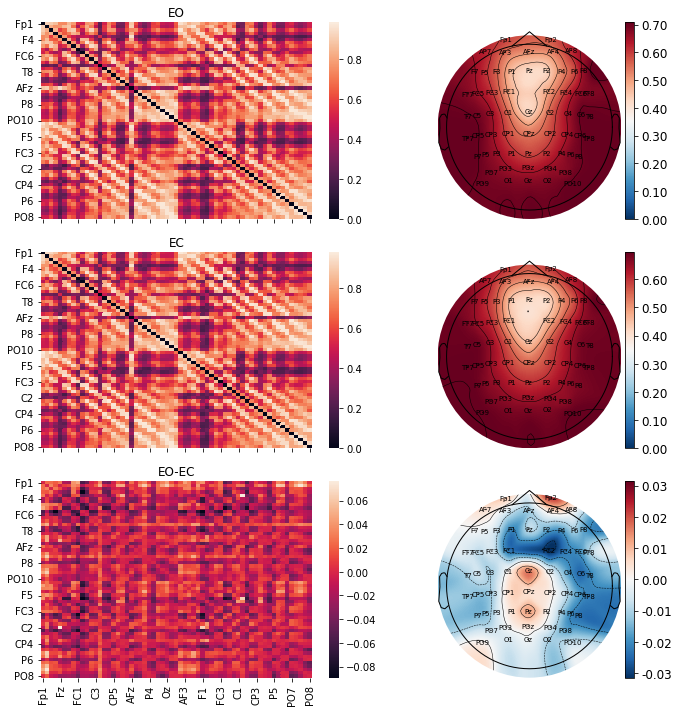

Note that the figure you will obtain will be significantly different than this one because coherence is impacted by volume conduction, whereas wpli_debiased is not!

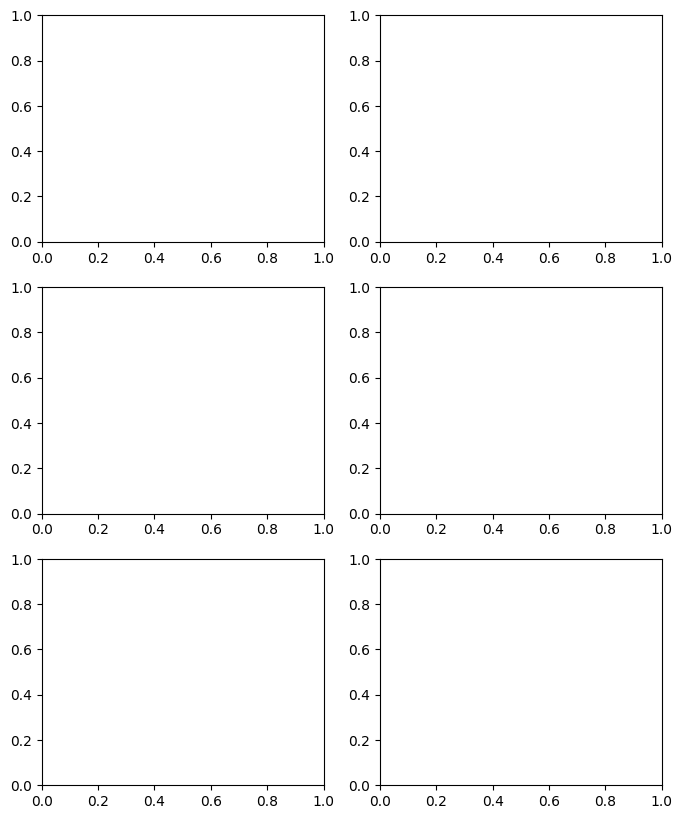

In [371]:
fig = plt.figure(figsize=(8, 10), facecolor='white')

gs6 = gridspec.GridSpec(3,2)
ax11 = fig.add_subplot(gs6[0,0])
ax12 = fig.add_subplot(gs6[0,1])


ax21 = fig.add_subplot(gs6[1,0])
ax22 = fig.add_subplot(gs6[1,1])



ax31 = fig.add_subplot(gs6[2,0])
ax32 = fig.add_subplot(gs6[2,1])



Look at lab 2 or 1 or the one with speherical plots.

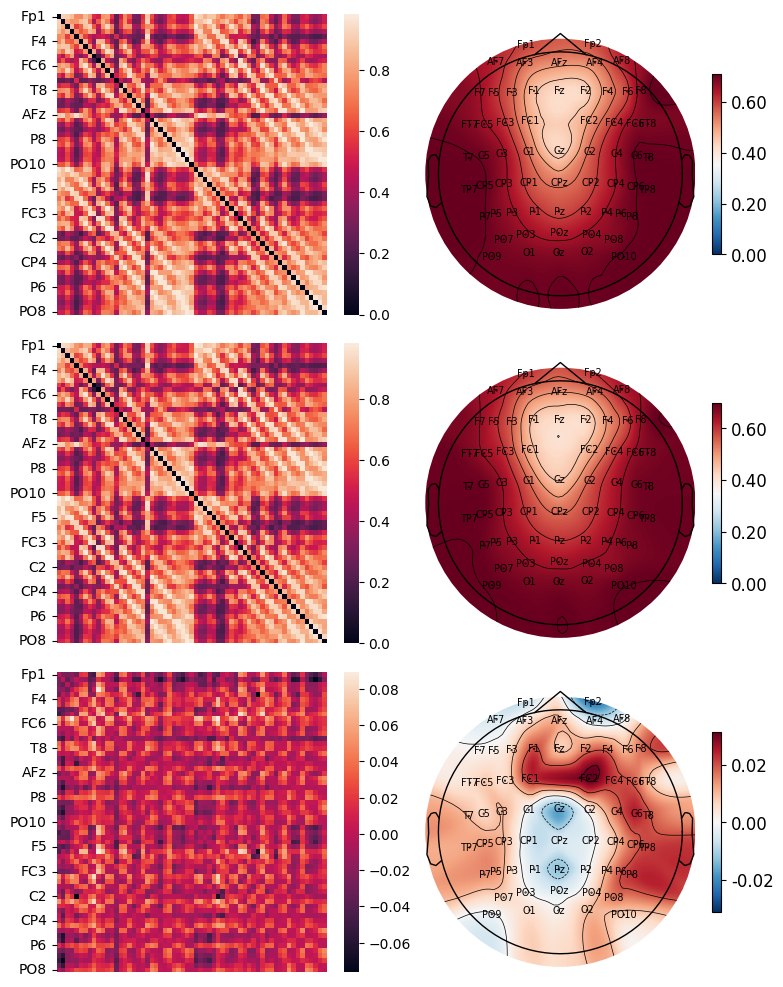

In [372]:
##### insert your code #####
import numpy as np
import pandas as pd
import seaborn as sns
from csce590 import plot_values_topomap

raw = raw_dict.values()
channels = raw_dict['EO', '032344'].ch_names
EO = []
EC = []

for key, val in connectivity.items():
  # print(val.shape)
  val = np.squeeze(val)
  # print(val.shape)
  if key[0] == 'EO':
    EO.append(val + val.T)
  else:
    EC.append(val + val.T)


EO = np.mean(EO, axis=0)
EC = np.mean(EC, axis=0)

EO_df = pd.DataFrame(EO, index=channels, columns=channels)
sns.heatmap(EO_df, yticklabels=5, xticklabels=False, ax=ax11)

EO_ch = EO_df.mean().to_dict()


plot_values_topomap(value_dict={k:v for k, v in EO_ch.items()}, axes=ax12,
                    montage=mne.channels.make_standard_montage('standard_1020'))


EC_df = pd.DataFrame(EC, index=channels, columns=channels)

sns.heatmap(EC_df, yticklabels=5, xticklabels=False, ax=ax21)

EC_ch = EC_df.mean().to_dict()


plot_values_topomap(value_dict={k:v for k, v in EC_ch.items()}, axes=ax22,
                    montage=mne.channels.make_standard_montage('standard_1020'))


EO_EC = EO-EC
EO_EC_df = pd.DataFrame(EO_EC, index=channels, columns=channels)
sns.heatmap(EO_EC_df, yticklabels=5, xticklabels=False, ax=ax31)

EO_EC_ch = EO_EC_df.mean().to_dict()


plot_values_topomap(value_dict={k:v for k, v in EO_EC_ch.items()}, axes=ax32,
                    montage=mne.channels.make_standard_montage('standard_1020'))

fig.tight_layout()
fig
############################

### Bonus exercise

This exercise is optional. If answered convincingly, I will add up to 20% to your score for this laboratory. Any point over 100% will be transferred to previous labs for which you did not get all your points.

For a recording of your choosing (among the 8 already loaded), compute the connectivity for 1) a measure of functional connectivity that is sensitive to volume conduction and 2) a measure that is robust against volume conduction. Then, plot two lines (one for each functional connectivity measure you chose) that depict the average amplitude of the connectivity as a function of inter-channel distance. What does this plot tell you? Is it coherent with what is known about the effect of volume conduction on functional connectivity? Why?

Hint: You can get the average position of channels on a standard montage as follows:
```
montage = mne.channels.make_standard_montage('standard_1020')
montage.get_positions()
```

In [ ]:
##### insert your code #####


I will answer this in the next lab

############################